In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from dtreeplt import dtreeplt
from sklearn.model_selection import cross_val_score

data = pd.read_csv("data/breast-cancer.csv")

In [2]:
data.head()

,code,clump,cell_size,cell_shape,adhesion,single,nuclei,chromatin,nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
code          699 non-null int64
clump         699 non-null int64
cell_size     699 non-null int64
cell_shape    699 non-null int64
adhesion      699 non-null int64
single        699 non-null int64
nuclei        699 non-null int64
chromatin     699 non-null int64
nucleoli      699 non-null int64
mitoses       699 non-null int64
class         699 non-null int64
dtypes: int64(11)
memory usage: 60.1 KB


In [4]:
## data['class'] = data['class'].astype('category') 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
code          699 non-null int64
clump         699 non-null int64
cell_size     699 non-null int64
cell_shape    699 non-null int64
adhesion      699 non-null int64
single        699 non-null int64
nuclei        699 non-null int64
chromatin     699 non-null int64
nucleoli      699 non-null int64
mitoses       699 non-null int64
class         699 non-null int64
dtypes: int64(11)
memory usage: 60.1 KB


In [6]:
data['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

In [7]:
X = data.drop(['class', 'code'], axis=1)
y = data['class']

### 의사결정나무

In [8]:
tree = DecisionTreeClassifier()
tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

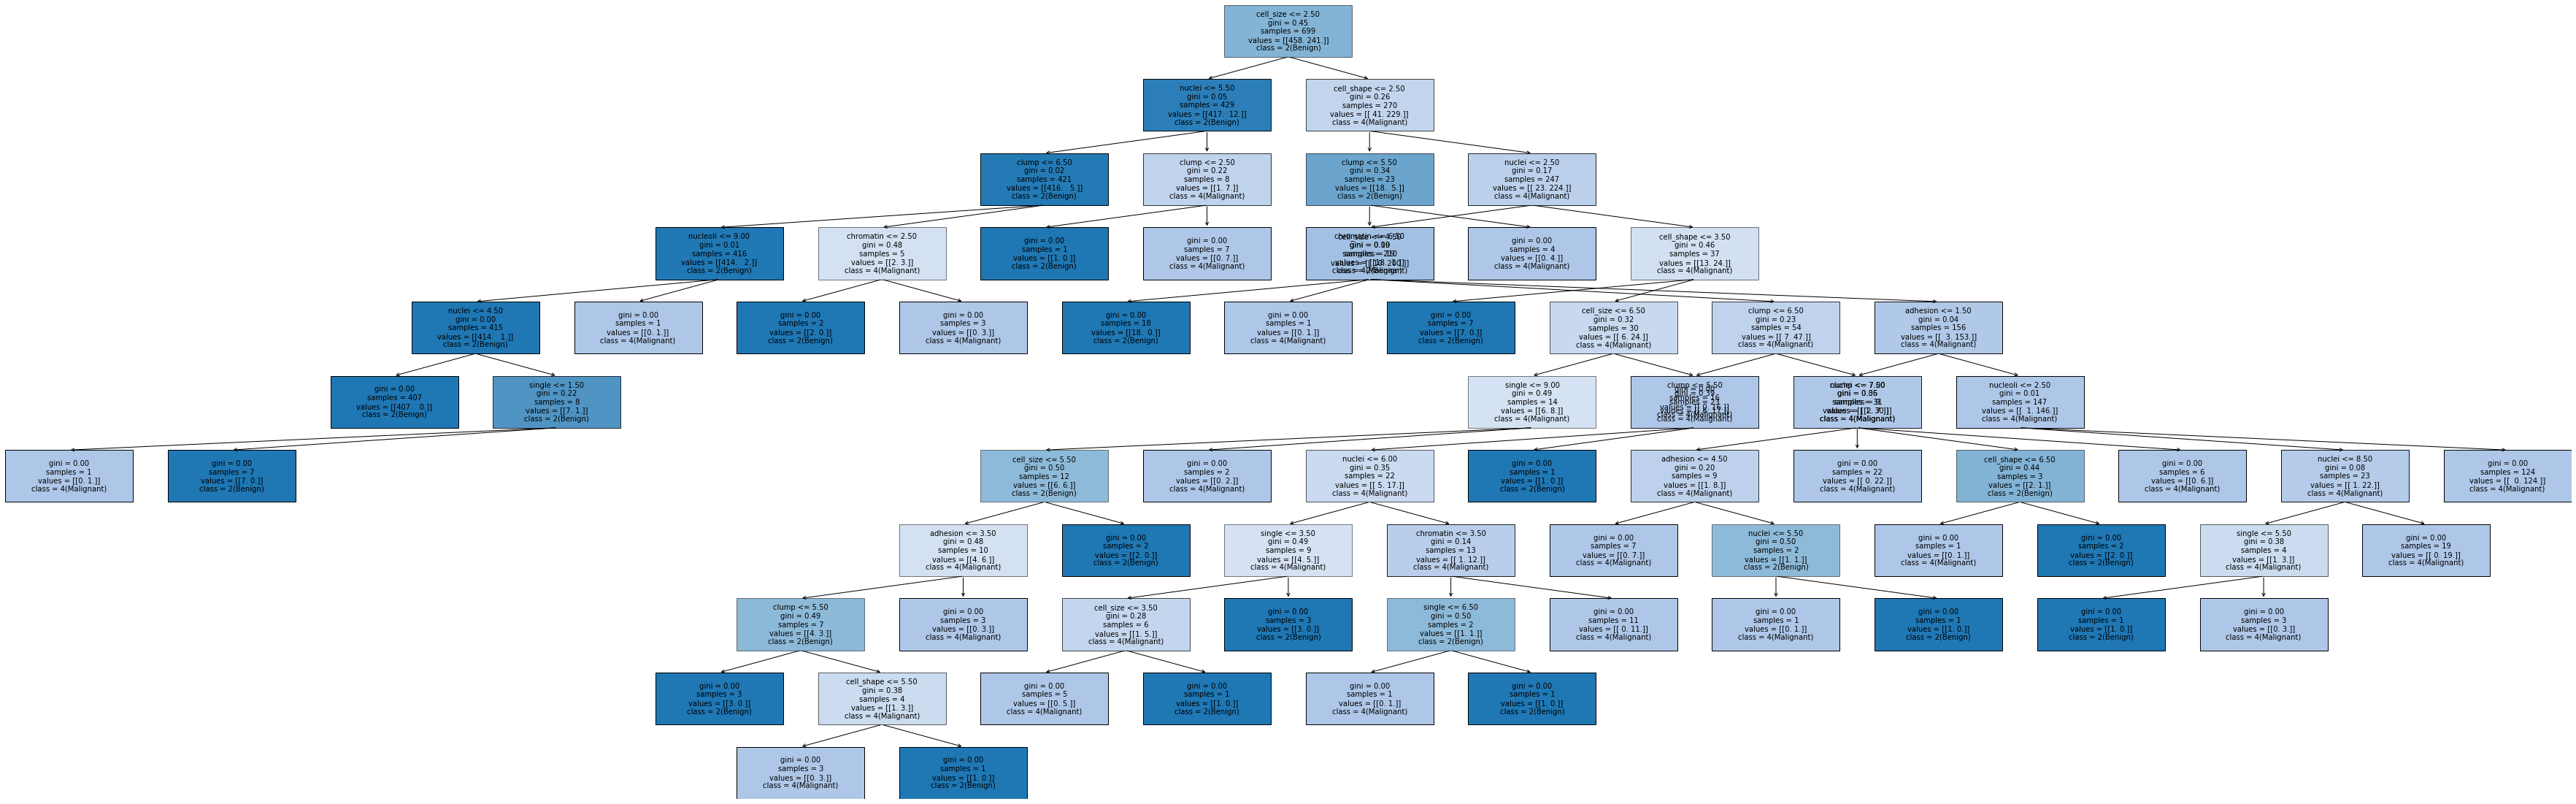

In [9]:
dtree = dtreeplt(
    model=tree,
    feature_names=X.columns,
    target_names=['2(Benign)', '4(Malignant)']
    )
fig = dtree.view()

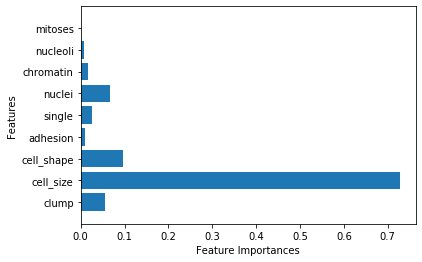

In [10]:
import matplotlib.pyplot as plt

def plot_feature_importances(model):
    n_features = model.feature_importances_.shape[0]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature Importances")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)

plot_feature_importances(tree)

In [11]:
scores = cross_val_score(tree, X, y, scoring='roc_auc', cv=5)

print("AUC of decision tree : {:.3f}".format(scores.mean()))

AUC of decision tree : 0.926


In [12]:
score_list = []
I = range(2,11)

for i in I:
    tree_cv = DecisionTreeClassifier(max_depth=i)
    scores = cross_val_score(tree_cv, X, y, scoring='roc_auc', cv=5)
    score_list.append(scores.mean())
    print("AUC score with max_depth {}: {:.3f}".format(i,scores.mean()))

AUC score with max_depth 2: 0.938
AUC score with max_depth 3: 0.960
AUC score with max_depth 4: 0.962
AUC score with max_depth 5: 0.956
AUC score with max_depth 6: 0.956
AUC score with max_depth 7: 0.931
AUC score with max_depth 8: 0.926
AUC score with max_depth 9: 0.925
AUC score with max_depth 10: 0.929


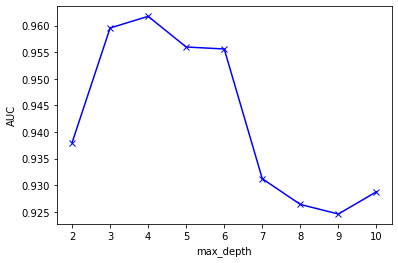

In [13]:
plt.plot(I, score_list, 'bx-')
plt.xlabel('max_depth')
plt.ylabel('AUC')
plt.show()

In [14]:
tree = DecisionTreeClassifier(max_depth=4)
scores = cross_val_score(tree, X, y, scoring='roc_auc', cv=5)

print("AUC of decision tree : {:.3f}".format(scores.mean()))

AUC of decision tree : 0.962


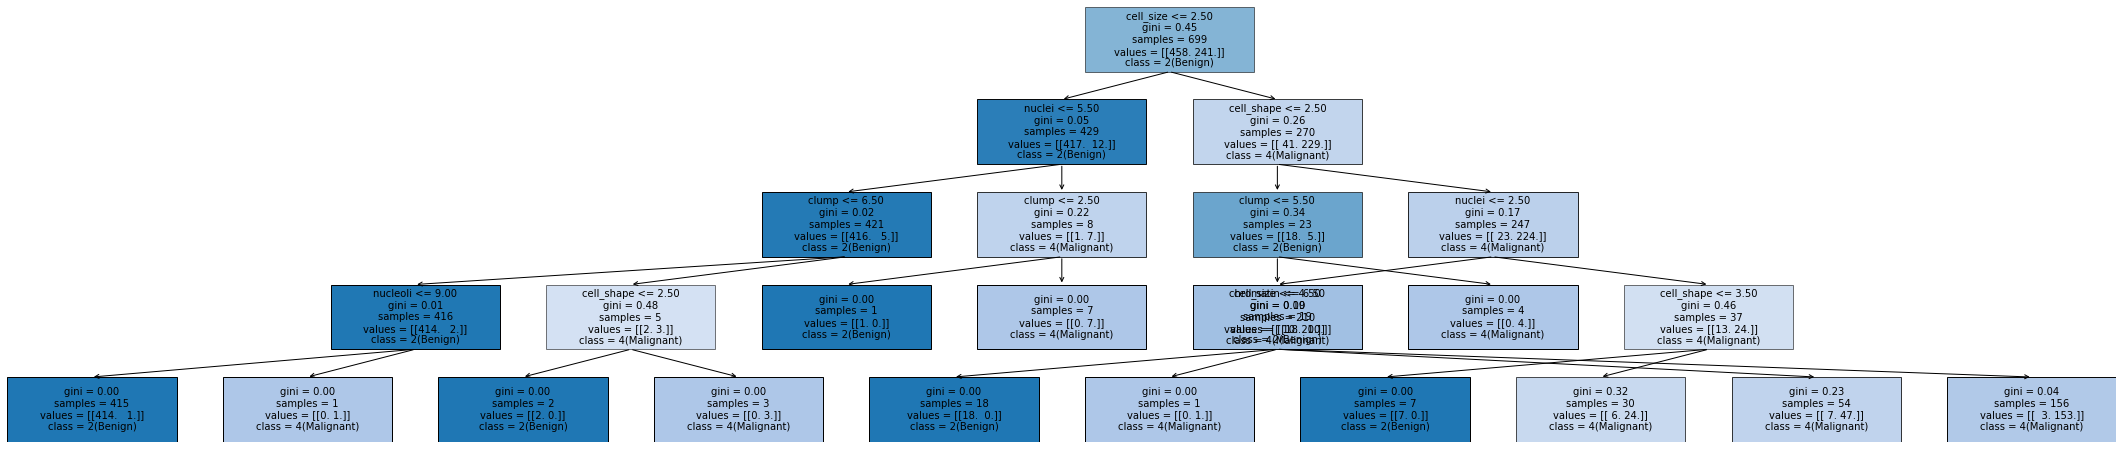

In [15]:
tree2 = DecisionTreeClassifier(max_depth=4)
tree2.fit(X,y)

dtree = dtreeplt(
    model=tree2,
    feature_names=X.columns,
    target_names=['2(Benign)', '4(Malignant)']
    )
fig = dtree.view()

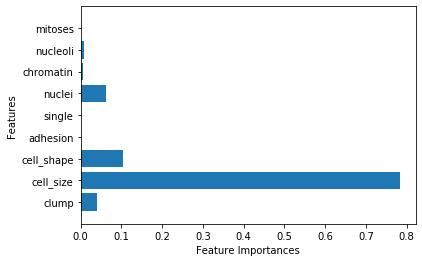

In [16]:
plot_feature_importances(tree2)

### 나이브 베이스

In [77]:
gnb = GaussianNB() 

scores = cross_val_score(gnb, X, y, scoring='roc_auc', cv=5)
scores.mean()

0.984816832550029

### 서포트 벡터 머신

In [78]:
linear_svm = LinearSVC(C=1, max_iter = 1000000)
scores = cross_val_score(linear_svm, X, y, scoring='roc_auc',cv=5)
scores.mean()

0.9946546798365785

In [79]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'C': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]}]

linear_svm = LinearSVC(max_iter=1000000)

grid_search = GridSearchCV(
    linear_svm, 
    param_grid, 
    cv=5, 
    scoring='roc_auc',
    return_train_score=True)

grid_search.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [80]:
grid_search.best_params_

{'C': 1}

In [81]:
import scipy.stats as stats
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'C': stats.uniform(0, 5)}

linear_svm = LinearSVC(max_iter=1000000)

n_iter_search = 50
random_search = RandomizedSearchCV(linear_svm, 
                                   param_distributions=param_dist,
                                   n_iter=n_iter_search,
                                   scoring='roc_auc',
                                   return_train_score=True
                                  )

random_search.fit(X,y)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                       fit_intercept=True, intercept_scaling=1,
                                       loss='squared_hinge', max_iter=1000000,
                                       multi_class='ovr', penalty='l2',
                                       random_state=None, tol=0.0001,
                                       verbose=0),
                   iid='deprecated', n_iter=50, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd36f3e7198>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='roc_auc', verbose=0)

In [82]:
random_search.best_params_

{'C': 1.1165355736412326}

In [83]:
linear_svm = LinearSVC(C=random_search.best_params_['C'], max_iter = 1000000)
scores = cross_val_score(linear_svm, X, y, scoring='roc_auc',cv=5)
scores.mean()

0.9946546798365787

- LinearSVC 가 제일 높은 성능을 보임